In [136]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

plt.rcParams["figure.figsize"] = (20,20)
plt.rcParams["font.size"] = 10

In [3]:
df = pd.read_csv("car data (2).csv")

In [6]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
df.shape

(301, 9)

In [ ]:
# how many unique values are in the categorical features ? 

In [22]:
print(df["Seller_Type"].unique())
print(df["Transmission"].unique())
print(df["Fuel_Type"].unique())
print(df["Owner"].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
['Petrol' 'Diesel' 'CNG']
[0 1 3]


In [15]:
# check the null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [17]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [16]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [20]:
final_df = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [23]:
final_df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [28]:
final_df["Current Year"] = 2022

In [32]:
final_df["no_years"] = final_df["Current Year"] - final_df["Year"]

In [33]:
final_df.drop(columns=["Year"], axis=1, inplace= True)

In [35]:
final_df

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,no_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,2022,6
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,2022,7
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,2022,13
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,2022,5


In [56]:
final_df = pd.get_dummies(final_df, drop_first=True)
corr_data = final_df.drop("Current Year", axis = 1)
corr_data

,Selling_Price,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,6,1,0,0,1
297,4.00,5.90,60000,0,7,0,1,0,1
298,3.35,11.00,87934,0,13,0,1,0,1
299,11.50,12.50,9000,0,5,1,0,0,1


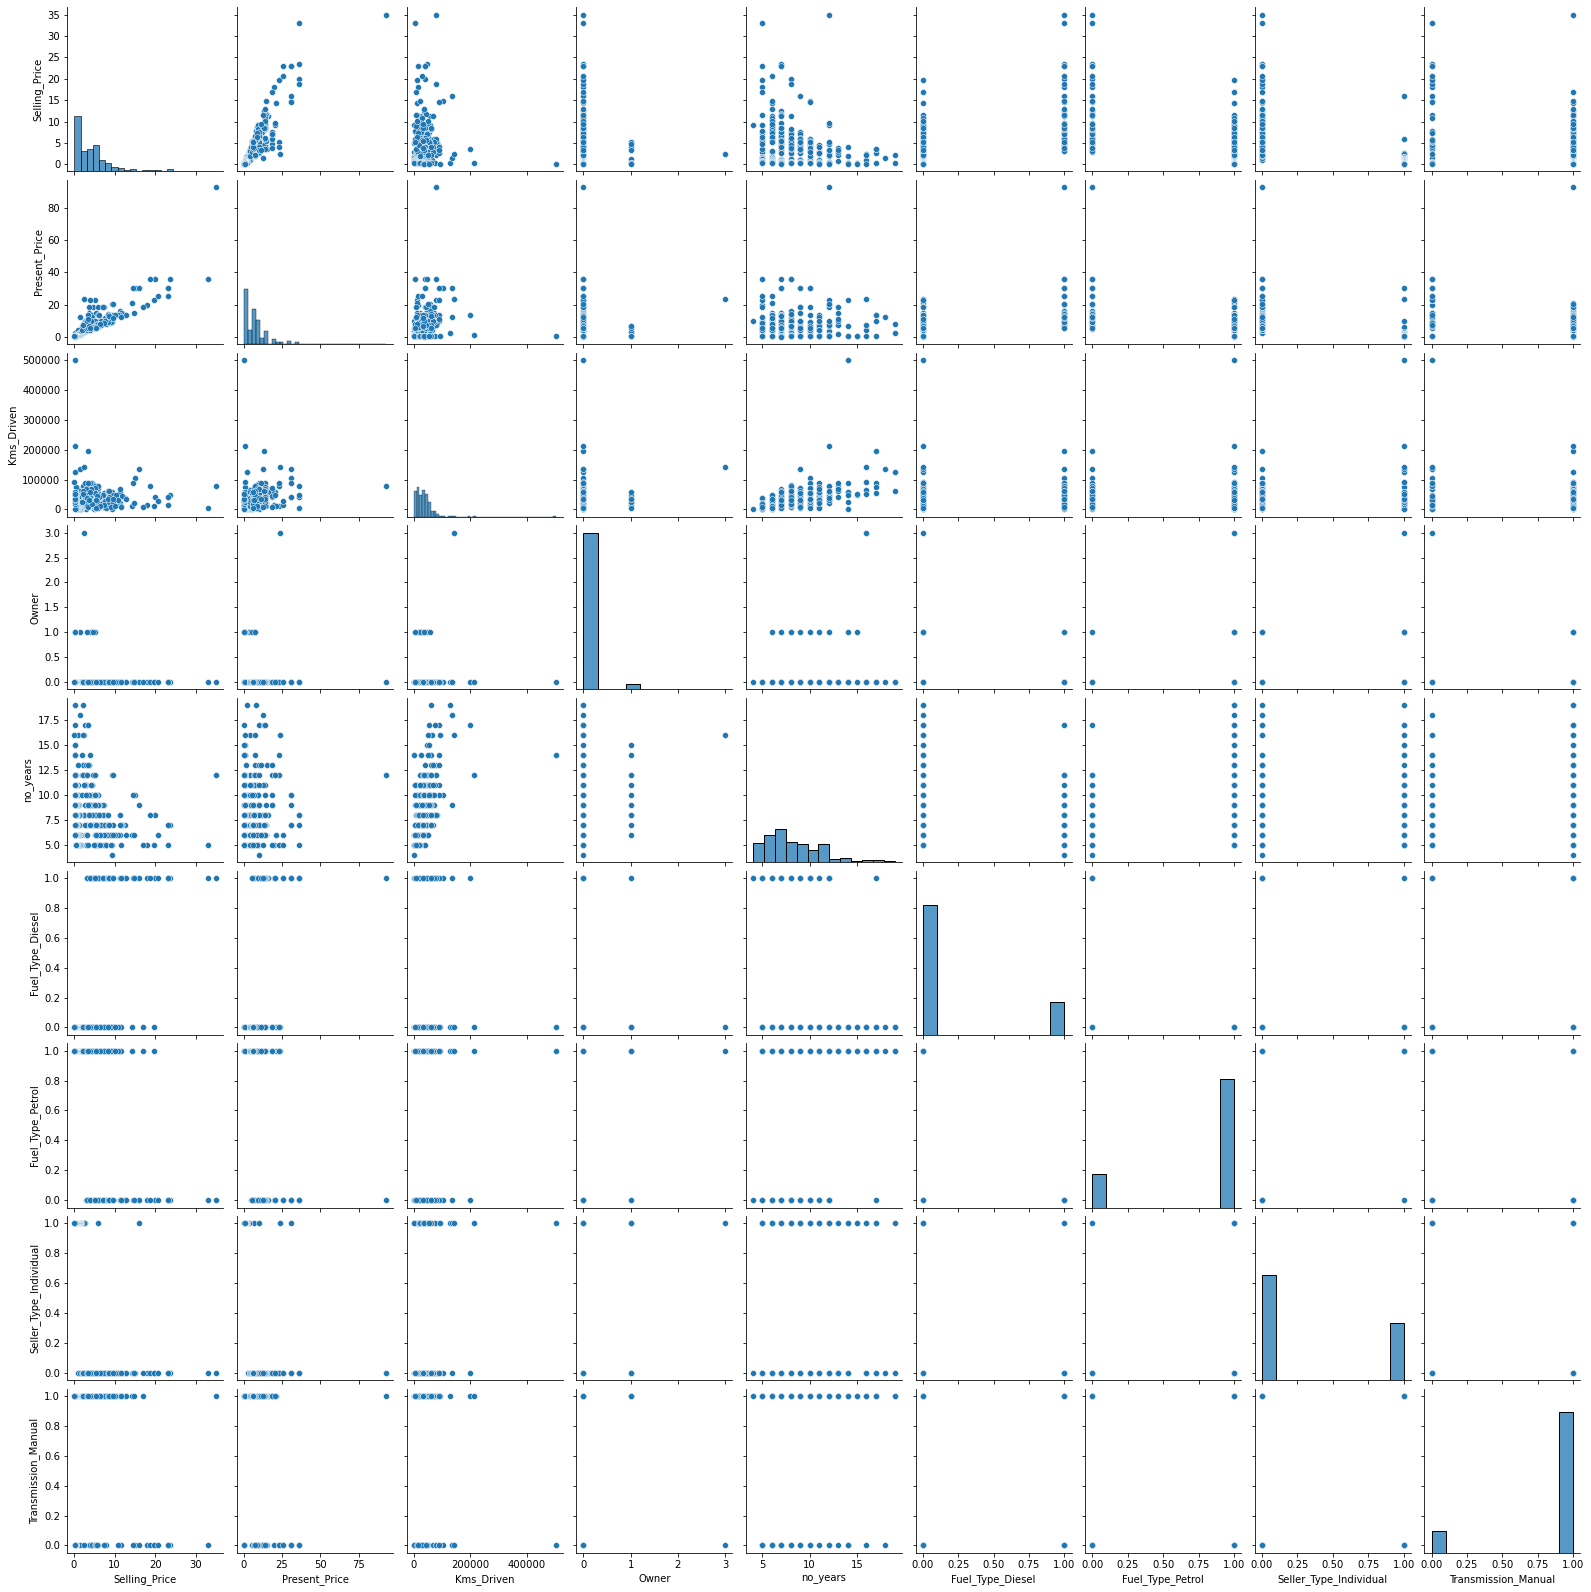

In [66]:
sns.pairplot(corr_data)

In [68]:
corr_data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.979184,0.161911,-0.261239,-0.360893,0.830981,-0.827156,-0.871950,-0.619522
Present_Price,0.979184,1.000000,0.300276,-0.211140,-0.184665,0.805545,-0.803436,-0.887417,-0.666173
Kms_Driven,0.161911,0.300276,1.000000,0.026639,0.683618,0.304093,-0.310535,-0.300227,-0.387011
Owner,-0.261239,-0.211140,0.026639,1.000000,0.226384,-0.217985,0.214156,0.246426,-0.078835
no_years,-0.360893,-0.184665,0.683618,0.226384,1.000000,-0.200502,0.191190,0.130498,-0.027090
Fuel_Type_Diesel,0.830981,0.805545,0.304093,-0.217985,-0.200502,1.000000,-0.999848,-0.745167,-0.385056
Fuel_Type_Petrol,-0.827156,-0.803436,-0.310535,0.214156,0.191190,-0.999848,1.000000,0.744822,0.377383
Seller_Type_Individual,-0.871950,-0.887417,-0.300227,0.246426,0.130498,-0.745167,0.744822,1.000000,0.375788
Transmission_Manual,-0.619522,-0.666173,-0.387011,-0.078835,-0.027090,-0.385056,0.377383,0.375788,1.000000


<AxesSubplot:>

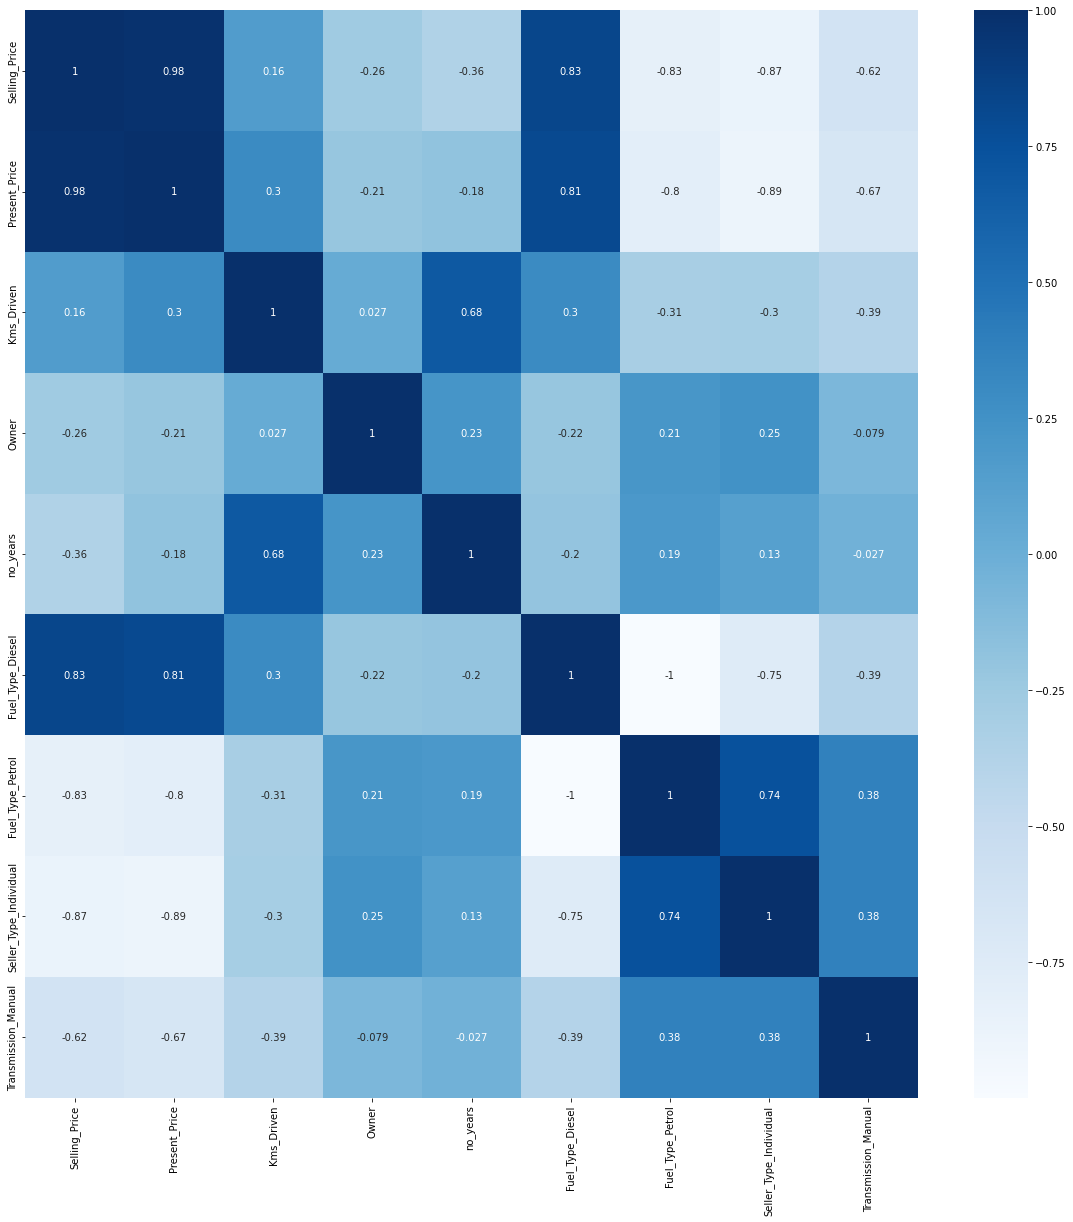

In [71]:
sns.heatmap(corr_data.corr(), annot = True, cmap="Blues")

In [100]:
final_df=final_df.drop(['Current Year'],axis=1)

In [129]:
X = final_df.drop("Selling_Price", axis = 1)
y = final_df["Selling_Price"]





In [132]:
threshold = 0.8

In [133]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [135]:
correlation(corr_data, threshold)

{'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Present_Price',
 'Seller_Type_Individual'}

In [112]:
# fit the model 
model = ExtraTreesRegressor().fit(X,y)

In [126]:
# put the Feature_importance in a variable 
graph = model.feature_importances_

In [122]:
# series gives you access to n largest
features_series = pd.Series(graph, X.columns)

<AxesSubplot:>

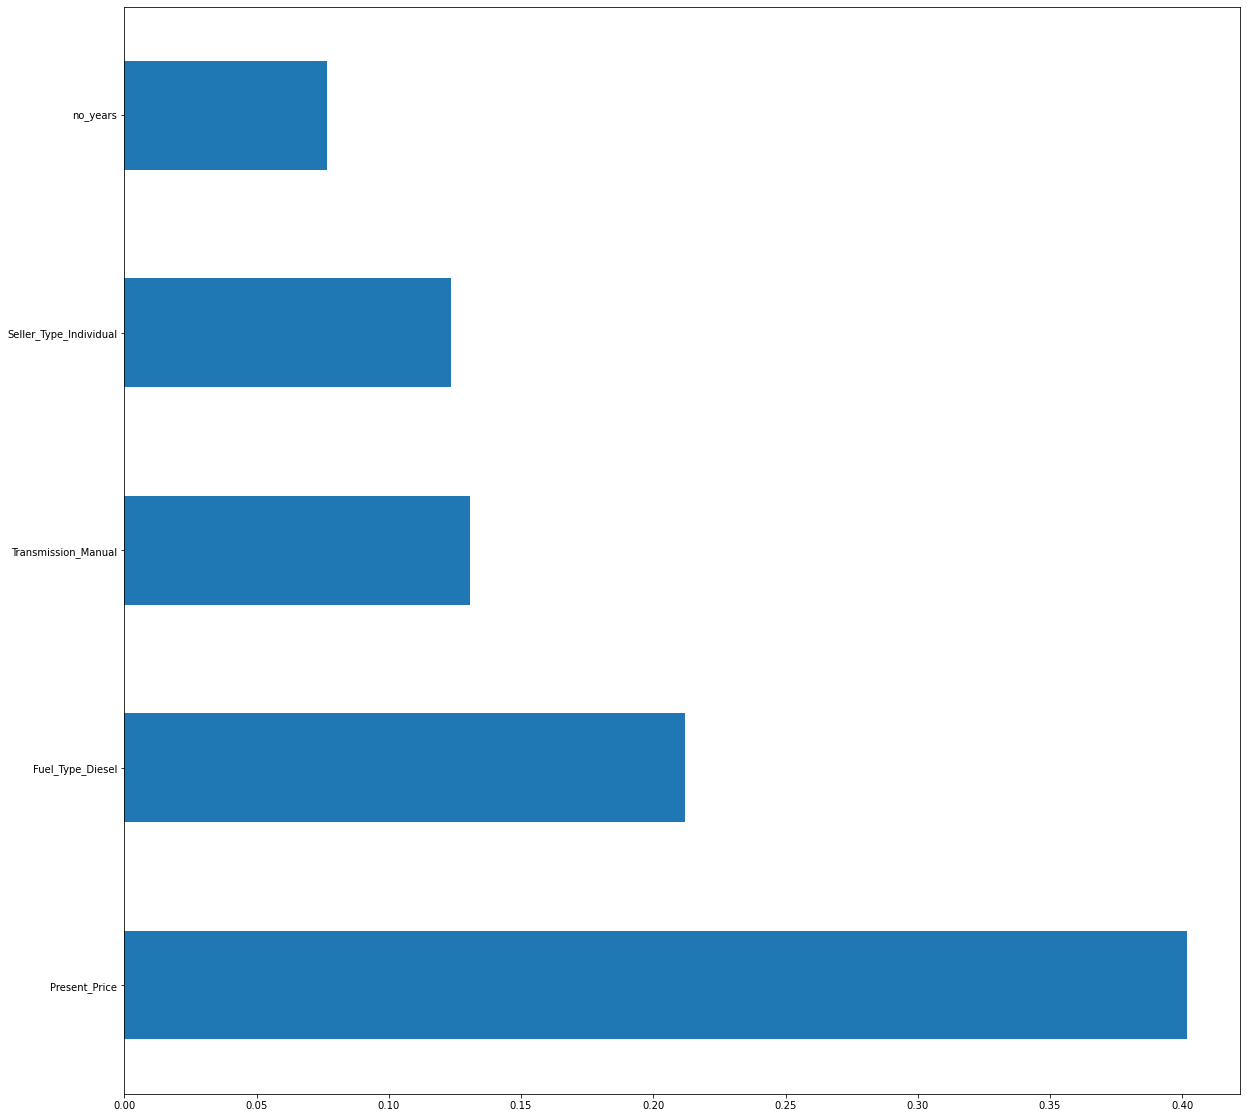

In [125]:
features_series.nlargest(5).plot(kind= "barh")

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=0, test_size=.2)

In [146]:
print(y_train.shape)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(240,)
(240, 8)
(61, 8)
(61,)


In [147]:
from sklearn.ensemble import RandomForestRegressor

In [188]:
rf_random = RandomForestRegressor()

In [192]:
from sklearn.model_selection import RandomizedSearchCV

In [195]:
?RandomForestRegressor

In [197]:
# Raqndomized search CV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [215]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [216]:
?RandomizedSearchCV

In [217]:
rf = RandomForestRegressor()

In [205]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
# hyperParameter Tuning using 
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [203]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.7s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.2s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.2s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.2s
[CV] END max_depth=15, max_fea

In [204]:
rf_random.best_score_

-3.542969442126781

In [184]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [187]:
predictions=rf_random.predict(X_test)


/Users/jaredpeck/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

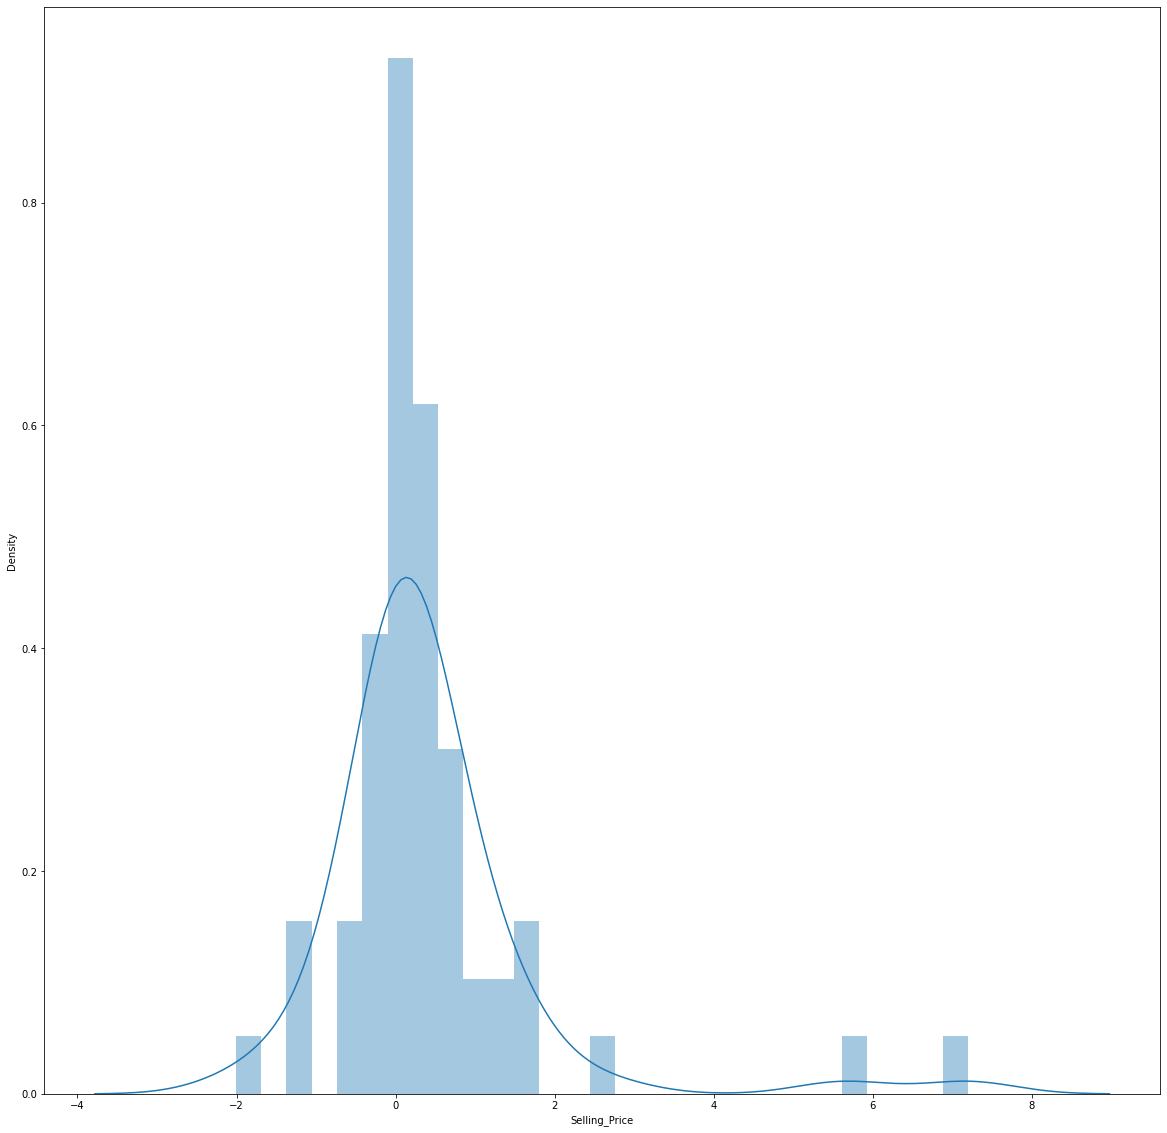

In [186]:
sns.distplot(y_test-predictions)

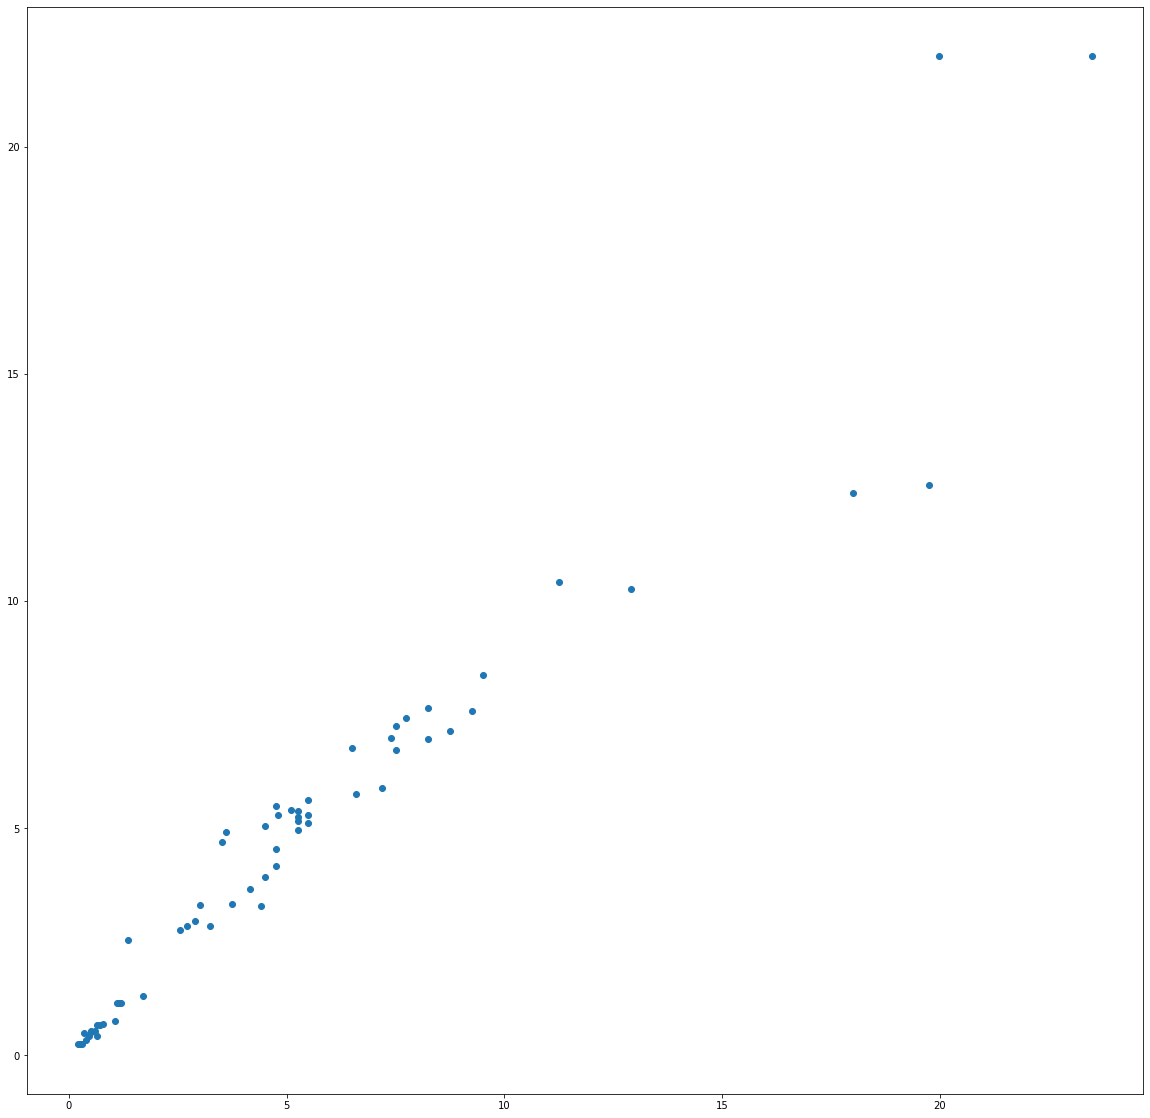

In [185]:
plt.scatter(y_test,predictions)

In [212]:
from sklearn import metrics

In [213]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.71254756156398
MSE: 1.9477162981831269
RMSE: 1.3956060684101108


In [214]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)